## Observations and Insights

## Dependencies and starter code

In [376]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [377]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [378]:
# Combine the data into a single dataset
mouse_study_results_merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_results_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [379]:
#mouse_study_results_ramicane = mouse_study_results_merged[mouse_study_results_merged['Drug Regimen'] == 'Ramicane']
#mouse_study_results_ramicane

In [380]:
#mouse_study_results_drug_regimen_groupby_data = mouse_study_results_merged.groupby(["Drug Regimen"])
mouse_study_results_drug_regimen_groupby_data = mouse_study_results_merged.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_study_results_drug_regimen_groupby_data

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [381]:
mouse_study_results_median_volume_data = mouse_study_results_merged.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_study_results_median_volume_data

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [382]:
mouse_study_results_variance_volume_data = mouse_study_results_merged.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_study_results_variance_volume_data

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [383]:
mouse_study_results_stddev_volume_data = mouse_study_results_merged.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
mouse_study_results_stddev_volume_data

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [384]:
mouse_study_results_sem_volume_data = mouse_study_results_merged.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
mouse_study_results_sem_volume_data

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [385]:
mouse_study_results_count_volume_data = mouse_study_results_merged.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
mouse_study_results_count_volume_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [386]:
# Tumor Volume Drug Regimen Summary (before charts)
mouse_study_results_summary_df = {'Mean': mouse_study_results_drug_regimen_groupby_data, 
                                  'Median': mouse_study_results_median_volume_data,
                                  'Variance': mouse_study_results_variance_volume_data,
                                  'Std Deviation': mouse_study_results_stddev_volume_data,
                                  'SEM': mouse_study_results_sem_volume_data
                                 }
mouse_study_results_summary_final_df = pd.DataFrame(mouse_study_results_summary_df)

In [387]:
mouse_study_results_summary_final_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [388]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#per_school_types = school_data_df.set_index(["school_name"])["type"]
#per_school_types
x_and_y = mouse_study_results_merged.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
x_and_y

Drug Regimen
Ramicane    45.000000
Ramicane    38.825898
Ramicane    35.014271
Ramicane    34.223992
Ramicane    32.997729
              ...    
Naftisol    63.145652
Naftisol    65.841013
Naftisol    69.176246
Naftisol    70.314904
Naftisol    73.867845
Name: Tumor Volume (mm3), Length: 1893, dtype: float64

## Bar plots

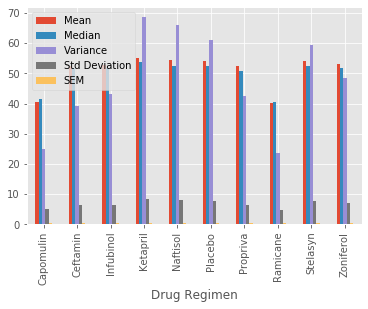

In [389]:
mouse_study_results_summary_final_df.plot.bar()

In [390]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mouse_study_results_summary_df = {'Mean': mouse_study_results_drug_regimen_groupby_data, 
                                  'Median': mouse_study_results_median_volume_data,
                                  'Variance': mouse_study_results_variance_volume_data,
                                  'Std Deviation': mouse_study_results_stddev_volume_data,
                                  'SEM': mouse_study_results_sem_volume_data
                                 }
mouse_study_results_summary_final_df2 = pd.DataFrame(mouse_study_results_summary_df)
mouse_study_results_summary_final_df2

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [391]:
DR_reg_temp = mouse_study_results_merged.groupby(["Drug Regimen"]).count()["Mouse ID"]
DR_reg_temp

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [392]:
DR_reg_temp_df = {'Drug Regimen': DR_reg_temp} 
DR_reg_temp_final_df = pd.DataFrame(DR_reg_temp_df)
DR_reg_temp_final_df

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [393]:
y_pos = np.arange(len("Drug Regimen"))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [394]:
mouse_study_results_summary_final_df2

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [395]:
x_temp = DR_reg_temp_final_df['Drug Regimen'].head()
#x_temp
x = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [396]:
mean_chart_data = [[40.675741, 41.557809, 24.947764, 4.994774, 0.32934640],
                   [52.591172, 51.776157, 39.290177, 6.268188, 0.469821],
                   [52.884795, 51.820584, 43.128684, 6.567243, 0.492236],
                   [55.235638, 53.698743, 68.553577, 8.279709, 0.603860],
                   [54.331565, 52.509285, 66.173479, 8.134708, 0.596466],
                   [54.033581, 52.288934, 61.168083, 7.821003, 0.581331],
                   [52.322552, 50.854632, 42.351070, 6.507770, 0.512884],
                   [40.216745, 40.673236, 23.486704, 4.846308, 0.320955],
                   [54.233149, 52.431737, 59.450562, 7.710419, 0.573111],
                   [53.236507, 51.818479, 48.533355, 6.966589, 0.516398]]
mean_chart_data

[[40.675741, 41.557809, 24.947764, 4.994774, 0.3293464],
 [52.591172, 51.776157, 39.290177, 6.268188, 0.469821],
 [52.884795, 51.820584, 43.128684, 6.567243, 0.492236],
 [55.235638, 53.698743, 68.553577, 8.279709, 0.60386],
 [54.331565, 52.509285, 66.173479, 8.134708, 0.596466],
 [54.033581, 52.288934, 61.168083, 7.821003, 0.581331],
 [52.322552, 50.854632, 42.35107, 6.50777, 0.512884],
 [40.216745, 40.673236, 23.486704, 4.846308, 0.320955],
 [54.233149, 52.431737, 59.450562, 7.710419, 0.573111],
 [53.236507, 51.818479, 48.533355, 6.966589, 0.516398]]

In [397]:
bar_chart_df = pd.DataFrame(mean_chart_data, columns=['Mean','Median','Variance','Std Deviation','SEM'], index=x)

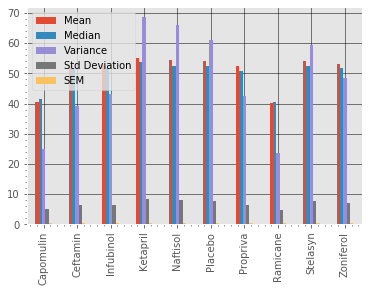

In [398]:
#TV_series = pd.Series("Tumor Volume (mm3)")
#DR_series = pd.Series("Drug Regimen")
#plt.bar(y_pos, TV_series, align='center')
#mouse_study_results_summary_final_df
#plt.xticks(DR_reg_temp_final_df, mouse_study_results_summary_final_df2)
#DR_reg_temp_df = {'Mean': mouse_study_results_summary_final_df2} 
#DR_reg_temp_final_df = pd.DataFrame(DR_reg_temp_df)
#DR_reg_temp_final_df
bar_chart_df.plot(kind='bar')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
##plt.bar(x, mean_chart_data)
plt.show()

## Pie plots

In [399]:
pie_plot_data = mouse_study_results_merged.groupby(["Sex"]).count()["Mouse ID"]
pie_plot_data

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

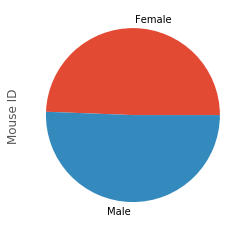

In [400]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_data.plot.pie()

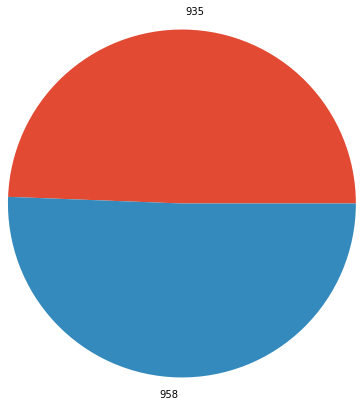

In [401]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.axis("equal")
plt.pie(pie_plot_data,labels=pie_plot_data,radius=2)
plt.show()

## Quartiles, outliers and boxplots

In [402]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_study_results_summary_final_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [403]:
mouse_study_results_by_mouse_id_data = mouse_study_results_merged.groupby(["Mouse ID","Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_study_results_by_mouse_id_data

Mouse ID  Drug Regimen
a203      Infubinol       55.983272
a251      Infubinol       55.938620
a262      Placebo         58.572588
a275      Ceftamin        52.044750
a366      Stelasyn        55.265582
                            ...    
z435      Propriva        47.115980
z578      Ramicane        38.160380
z581      Infubinol       53.062175
z795      Naftisol        55.613879
z969      Naftisol        60.522215
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [404]:
mouse_study_results_sum_volume_data = mouse_study_results_merged.groupby(["Mouse ID","Drug Regimen"]).sum()["Tumor Volume (mm3)"]
mouse_study_results_sum_volume_data

Mouse ID  Drug Regimen
a203      Infubinol       563.127077
a251      Infubinol       552.370946
a262      Placebo         586.116306
a275      Ceftamin        527.709651
a366      Stelasyn        382.479341
                             ...    
z435      Propriva        140.826641
z578      Ramicane        384.115100
z581      Infubinol       539.795837
z795      Naftisol        548.803167
z969      Naftisol        601.946523
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [405]:
#mouse_study_results_by_mouse_id_data.sort_values(by=['Tumor Volume (mm3)'], ascending=False).head(4)
mouse_study_results_by_mouse_id_df = {'Mouse ID': mouse_study_results_sum_volume_data, 
                                  'Drug Regimen': mouse_study_results_sum_volume_data,
                                  'Tumor Volume (mm3)': mouse_study_results_sum_volume_data
                                     }
mouse_study_results_by_mouse_id_final_df = pd.DataFrame(mouse_study_results_by_mouse_id_df)

In [406]:
#School and Student info
DR_TV_df = {'Mouse ID': [mouse_study_results_merged['Mouse ID']],
            'Drug Regimen': [mouse_study_results_merged['Drug Regimen']],
            'Tumor Volume (mm3)': [mouse_study_results_merged['Tumor Volume (mm3)']]}

DR_TV_final_df = pd.DataFrame(DR_TV_df, columns = ['Mouse ID',
                                                      'Drug Regimen',
                                                      'Tumor Volume (mm3)'
                                                     ])
DR_TV_final_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,0 k403 1 k403 2 k403 3 ...,0 Ramicane 1 Ramicane 2 Rami...,0 45.000000 1 38.825898 2 35...


In [407]:
prep_df_temp = pd.DataFrame((DR_TV_final_df), columns = ['Mouse ID','Drug Regimen'])
prep_df_temp

,Mouse ID,Drug Regimen
0,0 k403 1 k403 2 k403 3 ...,0 Ramicane 1 Ramicane 2 Rami...


In [408]:
mouse_study_results_merged
prep_df_temp = pd.DataFrame((DR_TV_final_df), columns = ['Timepoint','Tumor Volume (mm3)'])
prep_df_temp

,Timepoint,Tumor Volume (mm3)
0,NaN,0 45.000000 1 38.825898 2 35...


In [409]:
mouse_study_results_time_vs_volume_data = mouse_study_results_merged.groupby(["Timepoint","Drug Regimen"]).sum()["Tumor Volume (mm3)"]
mouse_study_results_time_vs_volume_data

Timepoint  Drug Regimen
0          Capomulin       1125.000000
           Ceftamin        1125.000000
           Infubinol       1125.000000
           Ketapril        1125.000000
           Naftisol        1125.000000
                              ...     
45         Placebo          748.924904
           Propriva         463.809701
           Ramicane         699.111896
           Stelasyn         752.821415
           Zoniferol        923.452430
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [410]:
#mouse_study_results_capomulin_time_vs_volume_data = mouse_study_results_time_vs_volume_data["Drug Regimen"] == "Capomulin"
mouse_study_results_capomulin_time_vs_volume_data = mouse_study_results_merged["Drug Regimen"] == "Capomulin"
mouse_study_results_capomulin_time_vs_volume_data
mouse_study_results_capomulin_time_vs_volume_data_df = mouse_study_results_merged[mouse_study_results_capomulin_time_vs_volume_data]
mouse_study_results_capomulin_time_vs_volume_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [411]:
mouse_study_results_capomulin_data_for_chart = mouse_study_results_capomulin_time_vs_volume_data_df.groupby(["Timepoint"]).sum()["Tumor Volume (mm3)"]
mouse_study_results_capomulin_data_for_chart_df = pd.DataFrame(mouse_study_results_capomulin_data_for_chart)
mouse_study_results_capomulin_final_data_for_chart_df = pd.DataFrame(mouse_study_results_capomulin_data_for_chart_df, columns = ['Timepoint','Tumor Volume (mm3)'])
mouse_study_results_capomulin_final_data_for_chart_df

,Timepoint,Tumor Volume (mm3)
Timepoint,,
0,NaN,1125.000000
5,NaN,1106.652160
10,NaN,1077.107265
15,NaN,1009.543616
20,NaN,936.475482
25,NaN,878.669612
30,NaN,852.925464
35,NaN,831.970455
40,NaN,776.118017


In [412]:
temp_x_bottom = mouse_study_results_sum_volume_data.quantile([0, 0.5])
temp_x_bottom

0.0     45.000000
0.5    407.577084
Name: Tumor Volume (mm3), dtype: float64

In [413]:
temp_x_top = mouse_study_results_sum_volume_data.quantile([0.5, 1])
temp_x_top

0.5    407.577084
1.0    680.433258
Name: Tumor Volume (mm3), dtype: float64

In [415]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

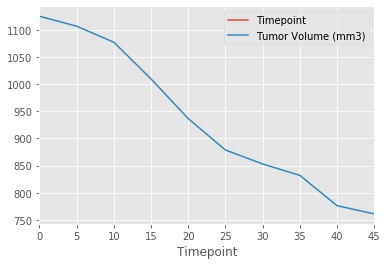

In [416]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_study_results_capomulin_final_data_for_chart_df.plot.line()

In [417]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#mouse_study_results_weight_avg_volume_groupby_data = mouse_study_results_capomulin_final_data_for_chart_df.groupby(["Weight (g)"]).rank(method='average')["Tumor Volume (mm3)"]
#pd.DataFrame(mouse_study_results_weight_avg_volume_groupby_data, columns = ['Weight (g)',
#                                                      'Tumor Volume (mm3)'
#                                                     ])
mouse_study_results_capomulin_final_data_for_scatter_chart_df = mouse_study_results_capomulin_final_data_for_chart_df['Tumor Volume (mm3)'].rank(method='average')
#mouse_study_results_capomulin_final_data_for_scatter_chart_df
mouse_study_results_capomulin_final_data_for_chart_df
#mouse_study_results_capomulin_final_data_for_scatter_chart_df

,Timepoint,Tumor Volume (mm3)
Timepoint,,
0,NaN,1125.000000
5,NaN,1106.652160
10,NaN,1077.107265
15,NaN,1009.543616
20,NaN,936.475482
25,NaN,878.669612
30,NaN,852.925464
35,NaN,831.970455
40,NaN,776.118017


In [418]:
time_df = pd.DataFrame(mouse_study_results_capomulin_final_data_for_chart_df, columns = ['Timepoint'])
time_df

,Timepoint
Timepoint,
0,NaN
5,NaN
10,NaN
15,NaN
20,NaN
25,NaN
30,NaN
35,NaN
40,NaN


In [419]:
volume_df = pd.DataFrame(mouse_study_results_capomulin_final_data_for_chart_df, columns = ['Tumor Volume (mm3)'])
volume_df

,Tumor Volume (mm3)
Timepoint,
0,1125.000000
5,1106.652160
10,1077.107265
15,1009.543616
20,936.475482
25,878.669612
30,852.925464
35,831.970455
40,776.118017


In [420]:
mouse_study_results_capomulin_time_vs_volume_data_df
weight_df = pd.DataFrame(mouse_study_results_capomulin_final_data_for_chart_df, columns = ['Weight (g)'])
weight_df

,Weight (g)
Timepoint,
0,NaN
5,NaN
10,NaN
15,NaN
20,NaN
25,NaN
30,NaN
35,NaN
40,NaN


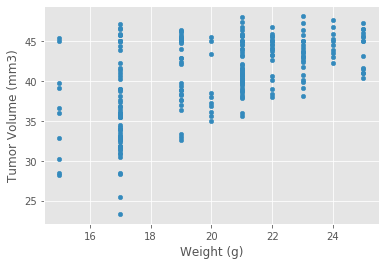

In [421]:
mouse_study_results_capomulin_time_vs_volume_data_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

In [422]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_df = pd.DataFrame(mouse_study_results_capomulin_time_vs_volume_data_df, columns = ['Weight (g)',
                                                   'Tumor Volume (mm3)'
                                                     ])
#corr_coef_df
corr_coef_df.corr(method='pearson')

,Weight (g),Tumor Volume (mm3)
Weight (g),1.0000,0.5257
Tumor Volume (mm3),0.5257,1.0000


In [423]:
npMatrix = np.matrix(mouse_study_results_capomulin_time_vs_volume_data_df)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y)
m = mdl.coef_[0]
b = mdl.intercept_
plt.scatter(X,Y,color='blue')
plt.plot([0,100],[b,m*100+b],'r')

NameError: name 'LinearRegression' is not defined